In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

45.025939122234035 16.792093872389188
-72.86271064749796 -56.11578217802638
-2.0999931950670856 157.87578957804487
-55.104915512862824 -53.28478479749698
-25.20583151508322 10.00477292259896
-89.26895947925343 174.2018692723642
84.31847858120281 -125.934026639418
-66.62080592812885 -172.59098582283698
29.42772073952304 -66.09644625961421
15.00996132893468 -54.37144977725852
34.845744789442435 2.716346024619753
-66.28077003971396 -175.70005049226992
73.76440738940542 -172.3132099152229
-43.00955860221953 56.79470390403307
-78.32230685293452 4.245008514640858
-11.658279498506474 -73.22283898140358
37.570750248376626 -51.65306572653731
44.84535348891427 -169.48067384467276
55.37148845594476 11.619824382214603
85.1623221826751 -173.454288678194
-65.97870059736627 115.60978349784006
45.888425565339304 29.41252012275072
-33.9437593812571 107.21190538379841
-73.57681022556218 80.8254172430008
75.730200078113 39.22923417070018
58.401419113632784 92.6946221139936
-15.857058466340987 -150.462805

6.762646917737953 32.81978183261032
27.31753601790308 -172.3219056827406
59.39949356270131 86.13794329255876
-31.298157063794434 100.85691939427011
55.17027239329204 -46.627366995732956
-40.06826074603469 -51.48578548925744
55.68393044669622 -67.42034447563458
71.52775538936831 78.7171630126607
55.85032391662867 -78.92392748718999
-60.03431857067159 -63.178586706870064
88.45328438321536 -83.09432774944126
21.720719977075106 51.43094085883848
31.066836713453398 64.55665327081479
-81.21899102246313 -90.45567467460225
41.57049483943629 -23.761635973003166
-59.004080975630416 68.63025130478707
86.3462804187204 -56.373727466902324
81.332907621537 47.654610821302185
55.72488212160914 141.7895418999862
-3.6229388964610507 86.83588294000714
64.02321387153711 -103.24590495797548
40.592161465759204 89.38250366682178
-63.19722492972855 -18.59398116026418
6.388458980019436 125.05967720679308
-1.973096038538472 -79.7441351147427
40.49045160066578 -150.97855436561414
29.38881400239599 24.22512338603

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [11]:
import requests
requests.__version__

'2.25.1'

In [23]:
# Import the API key.
from config import weather_api_key

In [24]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6a22f88d5ece10e7f219cdebaffffc5e


In [25]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6a22f88d5ece10e7f219cdebaffffc5e&q=Boston


In [26]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the API key.
from config import weather_api_key

In [27]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
    
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ken caryl
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | tautira
Processing Record 5 of Set 1 | baculin
Processing Record 6 of Set 1 | avera
Processing Record 7 of Set 1 | ponta do sol
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | araouane
Processing Record 12 of Set 1 | port macquarie
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | ginir
Processing Record 15 of Set 1 | le vauclin
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | necochea
Processing Record 18 of Set 1 | torbay
Processing Record 19 of Set 1 | umm lajj
Processing Record 20 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 21 of Set 1 | beloha
Processing Record 22 of Set 1 | bonavista
Processing Recor

Processing Record 39 of Set 4 | hecun
Processing Record 40 of Set 4 | camana
Processing Record 41 of Set 4 | mecca
Processing Record 42 of Set 4 | anahuac
Processing Record 43 of Set 4 | zenica
Processing Record 44 of Set 4 | broken hill
Processing Record 45 of Set 4 | shache
Processing Record 46 of Set 4 | zhigansk
Processing Record 47 of Set 4 | sandy bay
Processing Record 48 of Set 4 | jiwani
Processing Record 49 of Set 4 | hay river
Processing Record 50 of Set 4 | pangkalanbuun
Processing Record 1 of Set 5 | gurupa
Processing Record 2 of Set 5 | magistralnyy
Processing Record 3 of Set 5 | dzhusaly
City not found. Skipping...
Processing Record 4 of Set 5 | pisco
Processing Record 5 of Set 5 | kapit
Processing Record 6 of Set 5 | nipawin
Processing Record 7 of Set 5 | hilo
Processing Record 8 of Set 5 | oranjemund
Processing Record 9 of Set 5 | tuktoyaktuk
Processing Record 10 of Set 5 | basco
Processing Record 11 of Set 5 | kaitangata
Processing Record 12 of Set 5 | zhanaozen
Proces

Processing Record 28 of Set 8 | talcahuano
Processing Record 29 of Set 8 | tommot
Processing Record 30 of Set 8 | ketchikan
Processing Record 31 of Set 8 | leh
Processing Record 32 of Set 8 | azimur
City not found. Skipping...
Processing Record 33 of Set 8 | agadez
Processing Record 34 of Set 8 | shu
Processing Record 35 of Set 8 | walla walla
Processing Record 36 of Set 8 | halalo
City not found. Skipping...
Processing Record 37 of Set 8 | kapuskasing
Processing Record 38 of Set 8 | grao mogol
Processing Record 39 of Set 8 | kelcyre
Processing Record 40 of Set 8 | stokmarknes
Processing Record 41 of Set 8 | codrington
Processing Record 42 of Set 8 | bahadurganj
Processing Record 43 of Set 8 | epe
Processing Record 44 of Set 8 | kenai
Processing Record 45 of Set 8 | dunedin
Processing Record 46 of Set 8 | thiruvananthapuram
Processing Record 47 of Set 8 | usta muhammad
Processing Record 48 of Set 8 | forestville
Processing Record 49 of Set 8 | sirjan
Processing Record 50 of Set 8 | wah

Processing Record 15 of Set 12 | ola
Processing Record 16 of Set 12 | rapid valley
Processing Record 17 of Set 12 | pochutla
Processing Record 18 of Set 12 | ancud
Processing Record 19 of Set 12 | barbalha
Processing Record 20 of Set 12 | yantal
Processing Record 21 of Set 12 | togur
Processing Record 22 of Set 12 | holme
Processing Record 23 of Set 12 | tanggul
Processing Record 24 of Set 12 | lac du bonnet
Processing Record 25 of Set 12 | kashi
Processing Record 26 of Set 12 | santa elena
Processing Record 27 of Set 12 | ramnagar
Processing Record 28 of Set 12 | kaithal
Processing Record 29 of Set 12 | labutta
City not found. Skipping...
Processing Record 30 of Set 12 | lohardaga
Processing Record 31 of Set 12 | ixtapa
Processing Record 32 of Set 12 | pontypridd
Processing Record 33 of Set 12 | tidore
City not found. Skipping...
Processing Record 34 of Set 12 | los llanos de aridane
Processing Record 35 of Set 12 | turinsk
Processing Record 36 of Set 12 | alenquer
Processing Record 3

In [29]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ken Caryl,39.5773,-105.1169,30.34,85,31,1.01,US,2021-11-25 08:17:50
1,Mataura,-46.1927,168.8643,61.43,38,100,7.63,NZ,2021-11-25 08:18:43
2,Puerto Ayora,-0.7393,-90.3518,69.24,83,62,8.19,EC,2021-11-25 08:18:43
3,Tautira,-17.7333,-149.1500,78.82,79,39,12.64,PF,2021-11-25 08:18:44
4,Baculin,7.4525,126.5842,81.97,80,91,2.77,PH,2021-11-25 08:18:44
5,Avera,33.1940,-82.5271,40.87,37,50,2.08,US,2021-11-25 08:18:45
6,Ponta Do Sol,32.6667,-17.1000,65.03,61,99,7.70,PT,2021-11-25 08:18:45
7,Hermanus,-34.4187,19.2345,77.90,55,1,23.62,ZA,2021-11-25 08:17:05
8,Lebu,-37.6167,-73.6500,52.86,95,8,5.14,CL,2021-11-25 08:15:56
9,Ushuaia,-54.8000,-68.3000,38.86,81,75,4.61,AR,2021-11-25 08:18:46


In [32]:
#Reorder the column orders
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [34]:
city_data_df = city_data_df[new_column_order]

In [35]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ken Caryl,US,2021-11-25 08:17:50,39.5773,-105.1169,30.34,85,31,1.01
1,Mataura,NZ,2021-11-25 08:18:43,-46.1927,168.8643,61.43,38,100,7.63
2,Puerto Ayora,EC,2021-11-25 08:18:43,-0.7393,-90.3518,69.24,83,62,8.19
3,Tautira,PF,2021-11-25 08:18:44,-17.7333,-149.1500,78.82,79,39,12.64
4,Baculin,PH,2021-11-25 08:18:44,7.4525,126.5842,81.97,80,91,2.77
...,...,...,...,...,...,...,...,...,...
548,Concepcion Del Oro,MX,2021-11-25 08:22:53,24.6333,-101.4167,54.81,48,57,2.62
549,Te Anau,NZ,2021-11-25 08:22:53,-45.4167,167.7167,52.56,77,100,9.13
550,Sterling,US,2021-11-25 08:18:46,39.0062,-77.4286,37.76,76,75,3.44
551,Lufilufi,WS,2021-11-25 08:22:54,-13.8745,-171.5986,78.58,75,8,12.68


In [37]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [44]:
# Extract relevant fields from the DataFrame for Plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

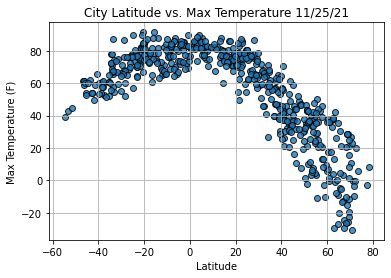

In [45]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolors="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the Figure.
plt.savefig("weather_data/Fig1.png")

# Show Plot
plt.show()

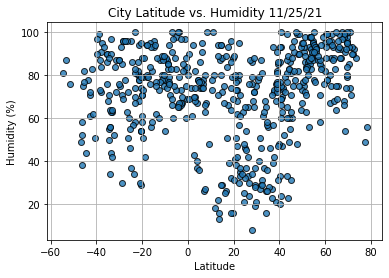

In [46]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

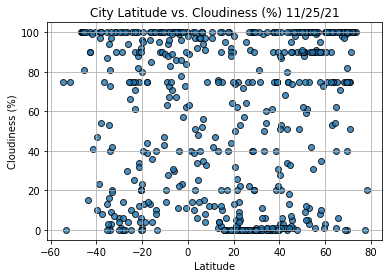

In [47]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

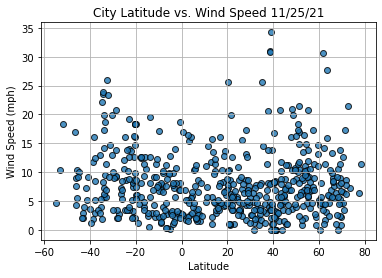

In [48]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()